In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


In [25]:
# Load the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [30]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# For binary classification, let's consider only two classes
binary_data = data[data['target'].isin([0, 1])]

In [ ]:
# Consider only class Iris-Virginica (class 2) for binary classification
#binary_data = data[data['target'] == 2]

In [4]:
# Extract features and target variable
X = binary_data.iloc[:, :-1].values
y = binary_data.iloc[:, -1].values


In [5]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(len(X_train)), X_train))
X_test = np.column_stack((np.ones(len(X_test)), X_test))

In [7]:
# Sigmoid (logistic) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


In [8]:
# Initialize parameters
theta_initial = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

In [19]:
# Run gradient descent
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta_initial, learning_rate, num_iterations)
print(theta_optimal)

[-0.27076706 -0.39455146 -1.5025754   2.30283468  1.00186243]


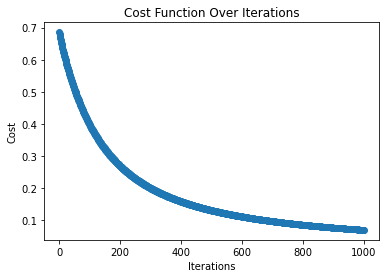

In [10]:
# Plot the cost over iterations
plt.plot(range(1, num_iterations + 1), cost_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

In [15]:
# Make predictions on the testing data
predictions = sigmoid(X_test @ theta_optimal)
binary_predictions = (predictions >= 0.5).astype(int)

In [16]:
# Model Evaluation
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


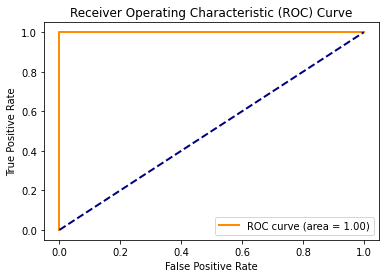

AUC-ROC Score: 1.0


In [17]:
# Visualize the ROC curve and calculate the AUC-ROC score
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc}')